Entrega: La entrega de este examen se realizará a traves del git hub.

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{k_{0}}{m}v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





# Solución: 

### 1. 

In [310]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import interpolate

# Definimos los parametros iniciales 
ρ_0 = 1.29
λ = 7482.2 

# Definimos la función para la densidad 
ρ = lambda y: ρ_0 * np.exp(-y/λ)


Text(0, 0.5, '$ρ (kg/m^{3}$)')

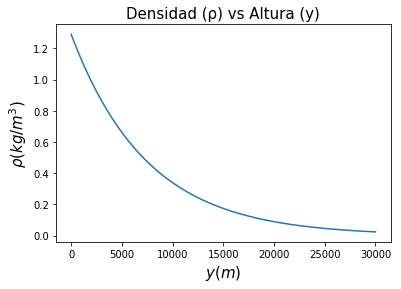

In [311]:
# Graficamos la densidad como funcíon de la altura

y_points = np.linspace(0,30000,1000) # de 0 hasta 30km

plt.plot(y_points,ρ(y_points))
plt.title("Densidad (ρ) vs Altura (y)" , size=15)
plt.xlabel('$y (m)$', size=15)
plt.ylabel('$ρ (kg/m^{3}$)', size=15)


### 2. 

Para resolver el problema escribimos el sistema en forma matricial 



Para solucionar el problema lo escribimos en forma matricial como : 

\begin{equation}
U=
\begin{bmatrix}
U_{0}\\
U_{1}
\end{bmatrix}=
\begin{bmatrix}
y\\
v
\end{bmatrix}
\end{equation}



\begin{equation}
\frac{d}{dt}
\begin{bmatrix}
y\\
v
\end{bmatrix}=
\begin{bmatrix}
v\\
-g + k_{0}v^{2} e^{\frac{-y}{\lambda}}
\end{bmatrix}
\end{equation}

\begin{equation}
\frac{d}{dt} U
\begin{bmatrix}
U_{1}\\
-g + k_{0}U_{1}^{2} e^{\frac{-U_{0}}{\lambda}}
\end{bmatrix}
\end{equation}



In [342]:
# Definimos los parametros a tener en cuenta para la ecuación diferencial 
A = 0.3
k = 1.29*A*0.8/2
g = -9.8 
m = 60 
λ = 7482.2

In [343]:
# definimos una función para la Ecuación diferencial 

def dU_dt(U, t, g=g, k_0=k, λ=λ, m=m ): 
    
    return [U[1], 
           g + (k_0/m) * U[1]**2 * np.exp(-U[0]/λ)] 

### Para h = 30 km 

In [344]:
#Solucionamos la ecuacion diferencial con la libreria de scipy integrate.odeint

U_0 = [30000,0] # Establecemos las condiciones de altura y velocidad iniciales, suponemos que se lanza del reposo.
# Este es el primer caso con altura máxima de 30000 m

points = np.linspace(0, 300, 100)
solve = integrate.odeint(dU_dt, U_0 , points)

Solo nos interesa la direccion positiva del eje Y, ya que el 0 es cuando toca el suelo, por tanto, vamos a restringir la lista a estos valores

In [345]:
def suelo(pos):
    for i in range(0,len(pos)):
        if pos[i] <= 0: 
            value = i
            break
    return value

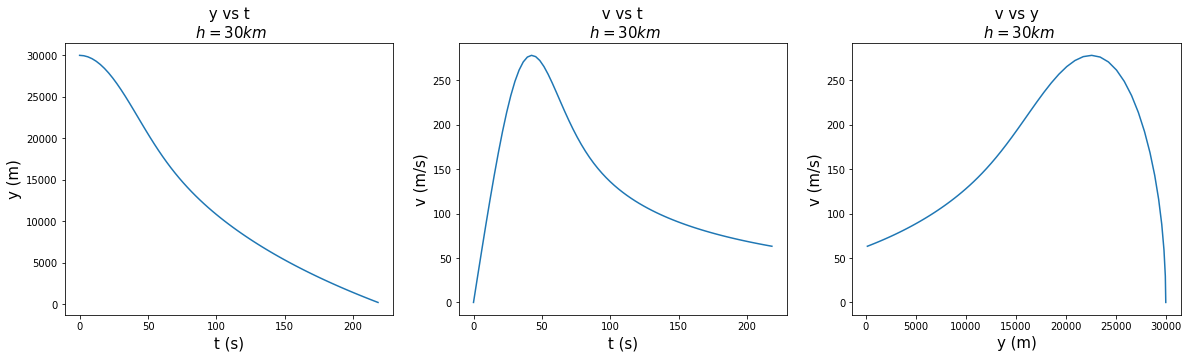

In [346]:
# Graficamos cada uno de los casos para esta primera condicion inicial de y = 30km 

def plot(solve,points,h):
    index = suelo(solve[:,0])
    posicion = solve[0:index,0]
    velocidad = -1*solve[0:index,1]
    points = points[0:index]

    plt.figure(figsize = (20,5))
    plt.subplot(131)
    plt.plot(points,posicion)
    plt.title(' y vs t' ' \n $h = {} km$'.format(h), size = 15)
    plt.ylabel('y (m)', size=15)
    plt.xlabel('t (s)', size=15)

    plt.subplot(132)
    plt.plot(points,velocidad)
    plt.title(' v vs t' ' \n $h = {} km$'.format(h), size = 15)
    plt.ylabel('v (m/s)', size=15)
    plt.xlabel('t (s)', size=15)

    plt.subplot(133)
    plt.plot(posicion,velocidad)
    plt.title(' v vs y' ' \n $h = {} km$'.format(h), size = 15)
    plt.ylabel('v (m/s)', size=15)
    plt.xlabel('y (m)', size=15)

plot(solve,points,30)

# Nota importante: Claramente la velocidad que nos da la solución ecuación diferencial va en sentido negativo del eje y. Sin embargo para fines de visualización es conveniente tener en cuenta el valor absoluto de la velocidad, ya que de antemanos se sabe que el paracaidista va en caida libre hacia la tierra. Por esto multiplicamos el vector de velocidades por -1 para que la gráfica en el eje y quede positiva. 

Ahora encontremos la velocidad máxima, para esto interpolamos mediante cubic splines la función velocidad y en un rango amplio de valores buscamos el máximo: 

La velocidad máxima númerica para h = 30 km es: 278.164 m/s
La velocidad máxima analítica para h = 30 km es: 277.903 m/s


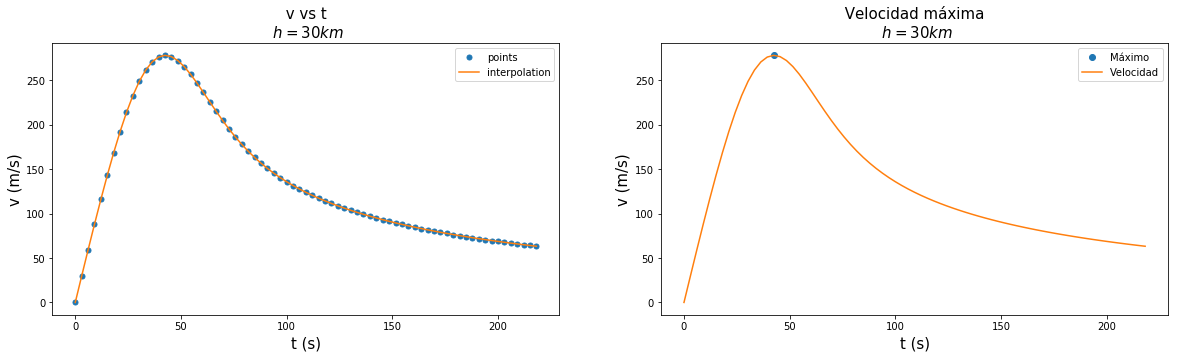

In [347]:
# Vamos a determinar la velocidad máxima 

def maximo(solve,points,h): 
    
    
    index = suelo(solve[:,0])
    posicion = solve[0:index,0]
    velocidad = -1*solve[0:index,1]
    points = points[0:index]
    cubic = interpolate.CubicSpline(points,velocidad)
    points2 =  np.linspace(0, 300, 1000)
    
    maxim = np.max(cubic(points2)) 
    plt.figure(figsize = (20,5))
    plt.subplot(121)
    plt.plot(points,velocidad,'o',markersize=5,label='points')
    plt.plot(points,cubic(points),label='interpolation')
    plt.legend()

    plt.title(' v vs t' ' \n $h = {} km$'.format(h), size = 15)
    plt.ylabel('v (m/s)', size=15)
    plt.xlabel('t (s)', size=15)
    
   
    plt.subplot(122)
    plt.plot(points2[np.where( cubic(points2)== maxim)],maxim,'o',label='Máximo')
    plt.plot(points,cubic(points),label = 'Velocidad')
    plt.legend()
    plt.title(' Velocidad máxima' ' \n $h = {} km$'.format(h), size = 15)
    plt.ylabel('v (m/s)', size=15)
    plt.xlabel('t (s)', size=15)
    
    # PARA CALCULAR LA VELOCIDAD MÁXIMA DE FORMA ANALITICA: 
    
    cubic2 = interpolate.CubicSpline(points,posicion)
    xm = cubic2(points2[np.where( cubic(points2)== maxim)])[0]
    vl = np.sqrt(m*-g/k)
    term1 = (vl**2) 
    term2 = np.exp(-xm/λ)
    maxim_analitic = np.sqrt(term1/term2)
    
    return maxim, maxim_analitic
    
max_30,max_30_a = maximo(solve,points,30)

print('La velocidad máxima númerica para h = 30 km es: {:.3f} m/s'.format(max_30) )
print('La velocidad máxima analítica para h = 30 km es: {:.3f} m/s'.format(max_30_a) )

Para encontrar la velocidad máxima de forma analitica consideramos que cuando se alcanza la máxima velocidad dv/dx=0. La velocidad máxima $v_{m}$ está dada por la expresión: 

\begin{equation}
v_{l}= \sqrt{\frac{mg}{xm}}
\end{equation}


\begin{equation}
v_{m} = \sqrt{  \frac{v_{l}^{2}} {e^{\frac{-h}{\lambda}}}   }
\end{equation}

Esto lo introducimos en la función anterior, en donde esta la parte del comentario. 


### Para h = 40 km 

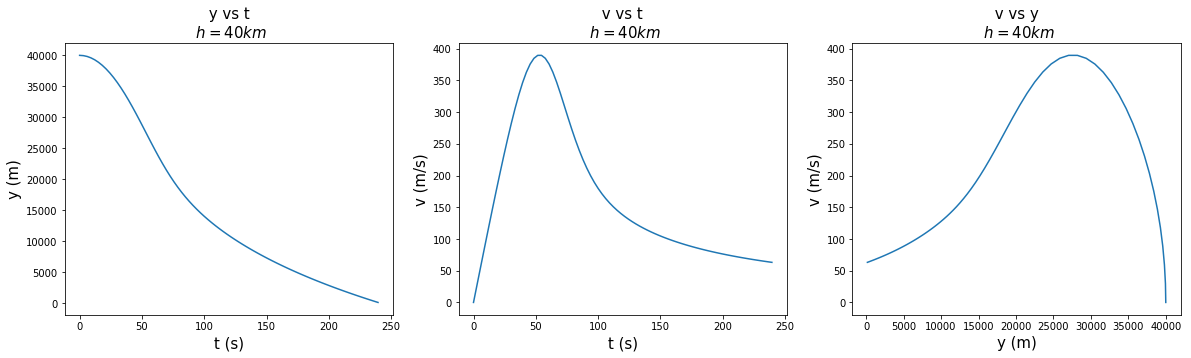

In [348]:
U_0 = [40000,0] 
points = np.linspace(0, 300, 100)
solve = integrate.odeint(dU_dt, U_0 , points)

plot(solve,points,40)

La velocidad máxima númerica para h = 40 km es: 390.005 m/s
La velocidad máxima analítica para h = 40 km es: 388.983 m/s


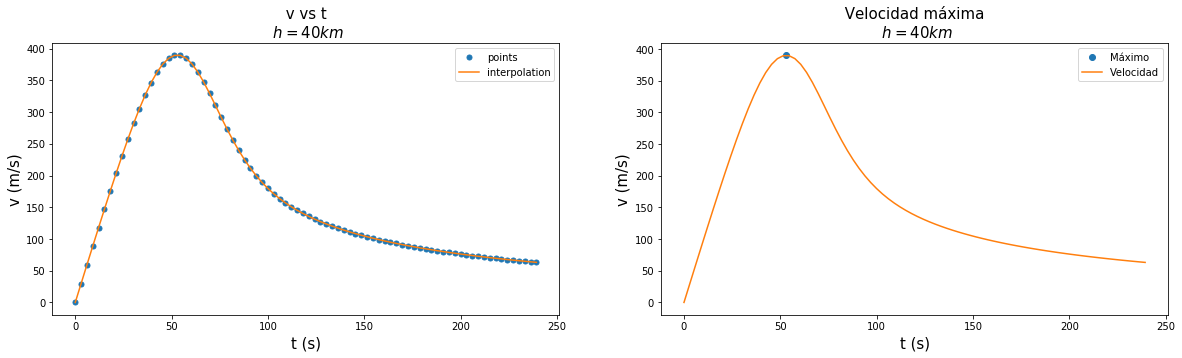

In [349]:
max_40,max_40_a = maximo(solve,points,40)
print('La velocidad máxima númerica para h = 40 km es: {:.3f} m/s'.format(max_40) )
print('La velocidad máxima analítica para h = 40 km es: {:.3f} m/s'.format(max_40_a) )

### Para h = 50 km

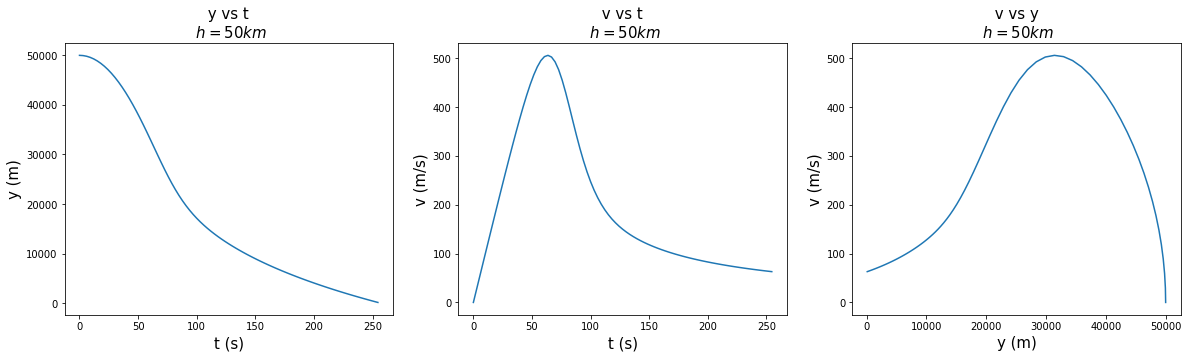

In [350]:
U_0 = [50000,0] 
points = np.linspace(0, 300, 100)
solve = integrate.odeint(dU_dt, U_0 , points)

plot(solve,points,50)

La velocidad máxima númerica para h = 50 km es: 505.468 m/s
La velocidad máxima analítica para h = 50 km es: 507.403 m/s


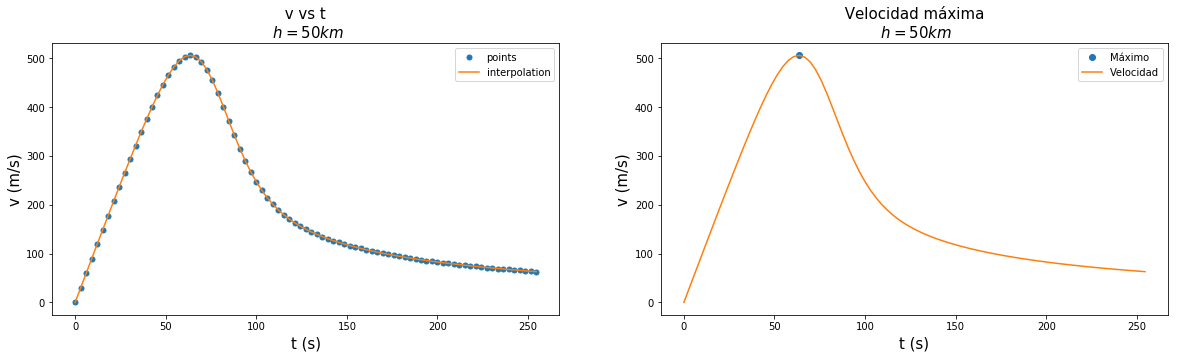

In [351]:
max_50,max_50_a = maximo(solve,points,50)
print('La velocidad máxima númerica para h = 50 km es: {:.3f} m/s'.format(max_50) )
print('La velocidad máxima analítica para h = 50 km es: {:.3f} m/s'.format(max_50_a) )

### Para h = 60 km

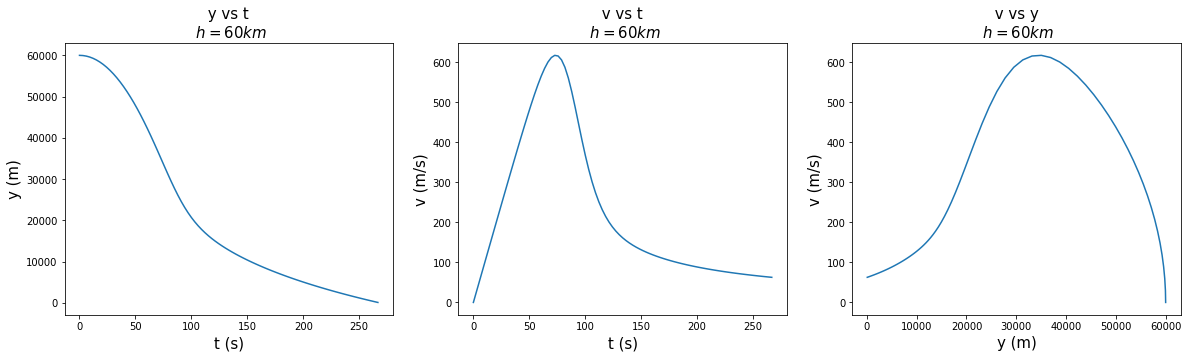

In [352]:
U_0 = [60000,0] 
points = np.linspace(0, 300, 100)
solve = integrate.odeint(dU_dt, U_0 , points)
plot(solve,points,60)

La velocidad máxima númerica para h = 60 km es: 617.713 m/s
La velocidad máxima analítica para h = 60 km es: 618.375 m/s


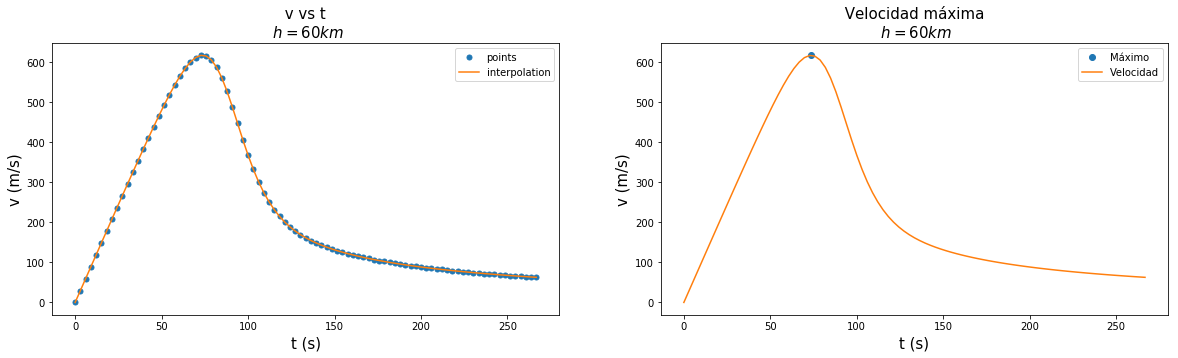

In [353]:
max_60, max_60_a = maximo(solve,points,60)
print('La velocidad máxima númerica para h = 60 km es: {:.3f} m/s'.format(max_60) )
print('La velocidad máxima analítica para h = 60 km es: {:.3f} m/s'.format(max_60_a) )

### Para h = 70 km

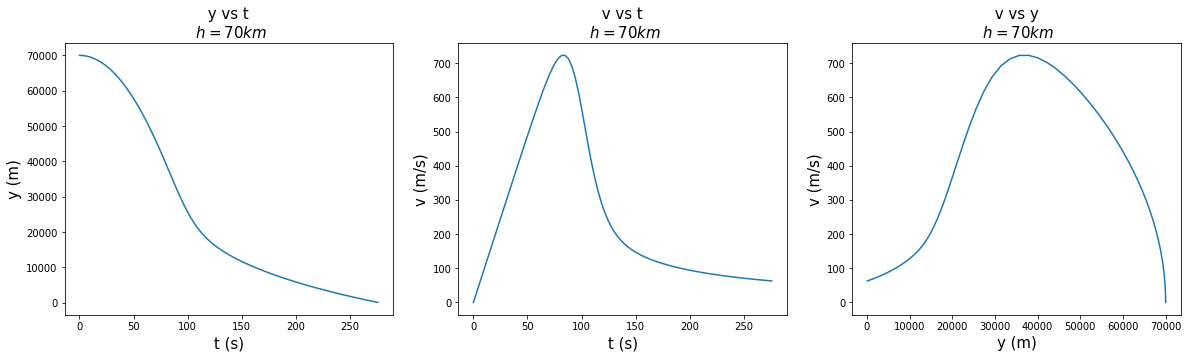

In [354]:
U_0 = [70000,0] 
points = np.linspace(0, 300, 100)
solve = integrate.odeint(dU_dt, U_0 , points)
plot(solve,points,70)

La velocidad máxima númerica para h = 70 km es: 723.794 m/s
La velocidad máxima analítica para h = 70 km es: 727.462 m/s


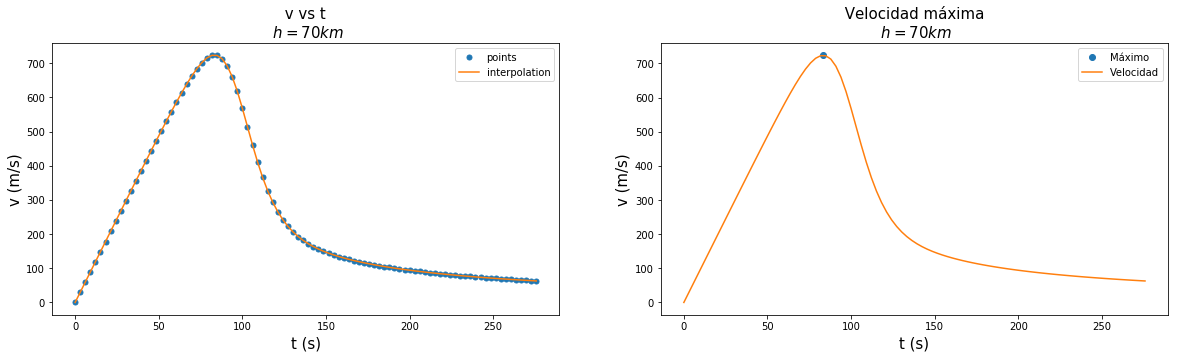

In [358]:
max_70,max_70_a = maximo(solve,points,70)
print('La velocidad máxima númerica para h = 70 km es: {:.3f} m/s'.format(max_70) )
print('La velocidad máxima analítica para h = 70 km es: {:.3f} m/s'.format(max_70_a) )

### Vamos a gráficar la velocidad máxima como función de la altura

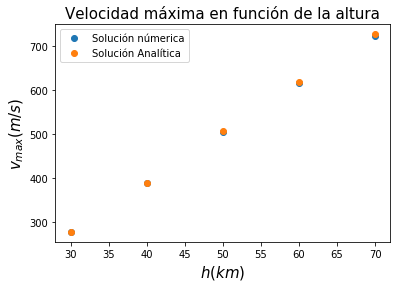

In [359]:
alturas = [30,40,50,60,70]
velocidades_max = [max_30,max_40,max_50,max_60,max_70]
velocidades_max_analiticas = [max_30_a,max_40_a,max_50_a,max_60_a,max_70_a]

plt.plot(alturas,velocidades_max, 'o', label = 'Solución númerica')
plt.plot(alturas,velocidades_max_analiticas, 'o', label = 'Solución Analítica')


plt.title('Velocidad máxima en función de la altura', size=15)
plt.xlabel('$h (km)$', size=15)
plt.ylabel('$v_{max} (m/s)$', size=15)
plt.legend()

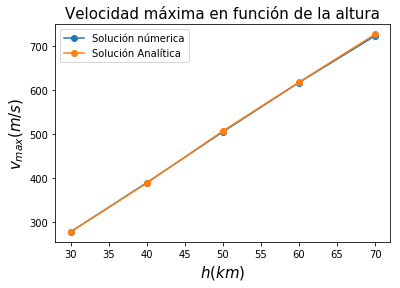

In [360]:
plt.plot(alturas,velocidades_max, '-o', label = 'Solución númerica')
plt.plot(alturas,velocidades_max_analiticas, '-o', label = 'Solución Analítica')


plt.title('Velocidad máxima en función de la altura', size=15)
plt.xlabel('$h (km)$', size=15)
plt.ylabel('$v_{max} (m/s)$', size=15)
plt.legend()

Lo que se observa es que mientras más grande es la altura inicial de la cual se lanza el paracaidista, más empiezan a diferir las velocidades máximas cálculadas de forma análitica y de forma númerica.